In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
news_dataset = pd.read_csv('fakenews.csv')

In [ ]:
news_dataset.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

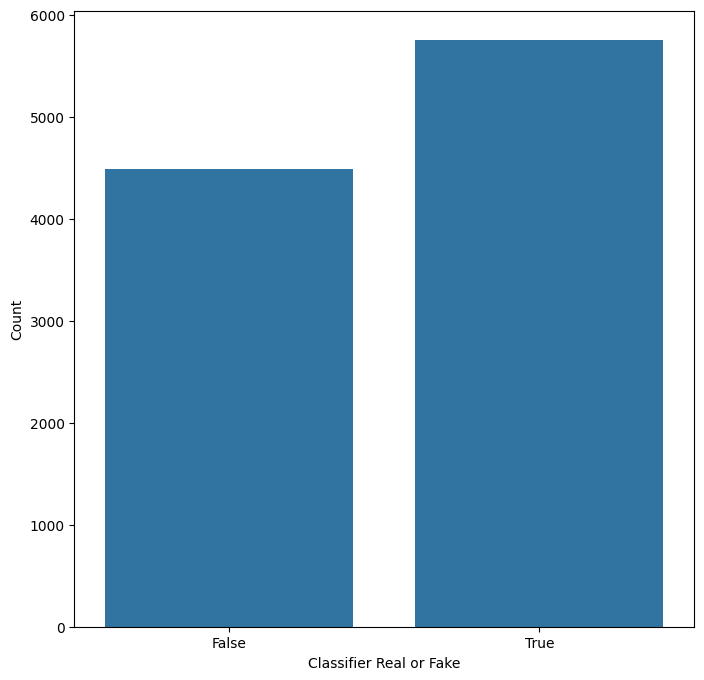

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=news_dataset)
plt.xlabel('Classifier Real or Fake')
plt.ylabel('Count')
plt.show()

In [ ]:
news_dataset['Label'].value_counts()

Label
True     5752
False    4488
Name: count, dtype: int64

In [ ]:
# separating the data & label
X = news_dataset.drop(columns='Label', axis=1)
Y = news_dataset['Label']

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['Statement'] = news_dataset['Statement'].apply(stemming)

In [ ]:
#separating the data and label
X = news_dataset['Statement'].values
Y = news_dataset['Label'].values

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 7033)	0.43836104606993825
  (0, 6863)	0.2767842857395208
  (0, 6638)	0.21194798355928404
  (0, 5914)	0.11657721567711764
  (0, 5159)	0.2930400485608947
  (0, 3945)	0.3263001128741299
  (0, 2909)	0.293820295505743
  (0, 1739)	0.34732939438485816
  (0, 282)	0.4578169364647548
  (0, 20)	0.25260483410894563
  (1, 6936)	0.20283750314555124
  (1, 6446)	0.6788655513491828
  (1, 5263)	0.1483000383738007
  (1, 4496)	0.2756521929556253
  (1, 2750)	0.2235463254425538
  (1, 2686)	0.222244586362325
  (1, 1691)	0.2739995359057514
  (1, 1258)	0.2756521929556253
  (1, 913)	0.1970741199206153
  (1, 602)	0.26801362153038855
  (1, 90)	0.19729793367841383
  (2, 7354)	0.19195158890134262
  (2, 4170)	0.27304360933647137
  (2, 3579)	0.26505747695182685
  (2, 3475)	0.30243471579471704
  :	:
  (10237, 4192)	0.3127860822484621
  (10237, 3989)	0.23207265652201578
  (10237, 2697)	0.32780834091310546
  (10237, 1492)	0.19044914650207545
  (10237, 217)	0.29776382358381875
  (10238, 7002)	0.3977343553550759
  (

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)


LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.770263671875


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy score of the testing data : ", test_data_accuracy)

Accuracy score of the testing data :  0.60546875


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
knn_predictions = knn_model.predict(X_train)

In [ ]:
knn_accuracy = accuracy_score(knn_predictions, Y_train)
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.7281494140625


In [ ]:
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(knn_predictions, Y_test)
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.59326171875


In [ ]:
def predict_news(X):
        new_data = [X]

        preprocessed_new_data = [stemming(text) for text in new_data]

        X_new = vectorizer.transform(preprocessed_new_data)

        predictions = model.predict(X_new)

        result = " "
        for i in predictions:
            if(i == True):
                result = "Real News"
            else:
                result = "Fake News"
        final_result = "This News is a: {}".format(result)
        return final_result

text_ex = "When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration."
print(predict_news(text_ex))


This News is a: Real News


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
headline = "Fake News Detector"
demo = gr.Interface(fn=predict_news,inputs="text",outputs="text",title=headline)
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Could not create share link. Missing file: /usr/local/lib/python3.10/dist-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.10/dist-packages/gradio


<IPython.core.display.Javascript object>